In [5]:
import fastf1 as ff1
from fastf1 import plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
from fastf1 import utils
from scipy.signal import argrelextrema
import matplotlib.patheffects as pe

In [6]:
ff1.plotting.setup_mpl()
ff1.Cache.enable_cache('../cache')
pd.options.mode.chained_assignment = None

In [7]:
year, grand_prix, session = 2023, 'Australia', 'Q'

session = ff1.get_session(year, grand_prix, session)
session.load()

core           INFO 	Loading data for Australian Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
C:\Users\Ricky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
C:\Users\Ricky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
C:\Users\Ricky\AppData\Local\Programs

In [8]:
driver_1, driver_2 = 'VER', 'RUS'
# Laps can now be accessed through the .laps object coming from the session
laps_driver_1 = session.laps.pick_driver(driver_1)
laps_driver_2 = session.laps.pick_driver(driver_2)

# Select the fastest lap
# fastest_driver_1 = laps_driver_1.loc[laps_driver_1['LapNumber'] == 23]
fastest_driver_1 = laps_driver_1.pick_fastest()
# fastest_driver_2 = laps_driver_2.loc[laps_driver_2['LapNumber'] == 23]
fastest_driver_2 = laps_driver_2.pick_fastest()

# Retrieve the telemetry and add the distance column
telemetry_driver_1 = fastest_driver_1.get_telemetry().add_distance()
telemetry_driver_2 = fastest_driver_2.get_telemetry().add_distance()

team_driver_1 = str(fastest_driver_1['Team'])
team_driver_2 = str(fastest_driver_2['Team'])

C:\Users\Ricky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
C:\Users\Ricky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
C:\Users\Ricky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] 

In [9]:
# Extract the delta time
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)

C:\Users\Ricky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ret.loc[:, ch] = ret.loc[:, ch].ffill().ffill().bfill()
C:\Users\Ricky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:508: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  merged.loc[:, col] = merged.loc[:, col].astype(dtype_map[col])
C:\Users\Ricky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will

In [10]:
plot_size = [15, 15]
plot_title = f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1} VS {driver_2}"
plot_ratios = [1, 3, 2, 1, 1, 2, 1]
plot_filename = plot_title.replace(" ", "") + ".png"

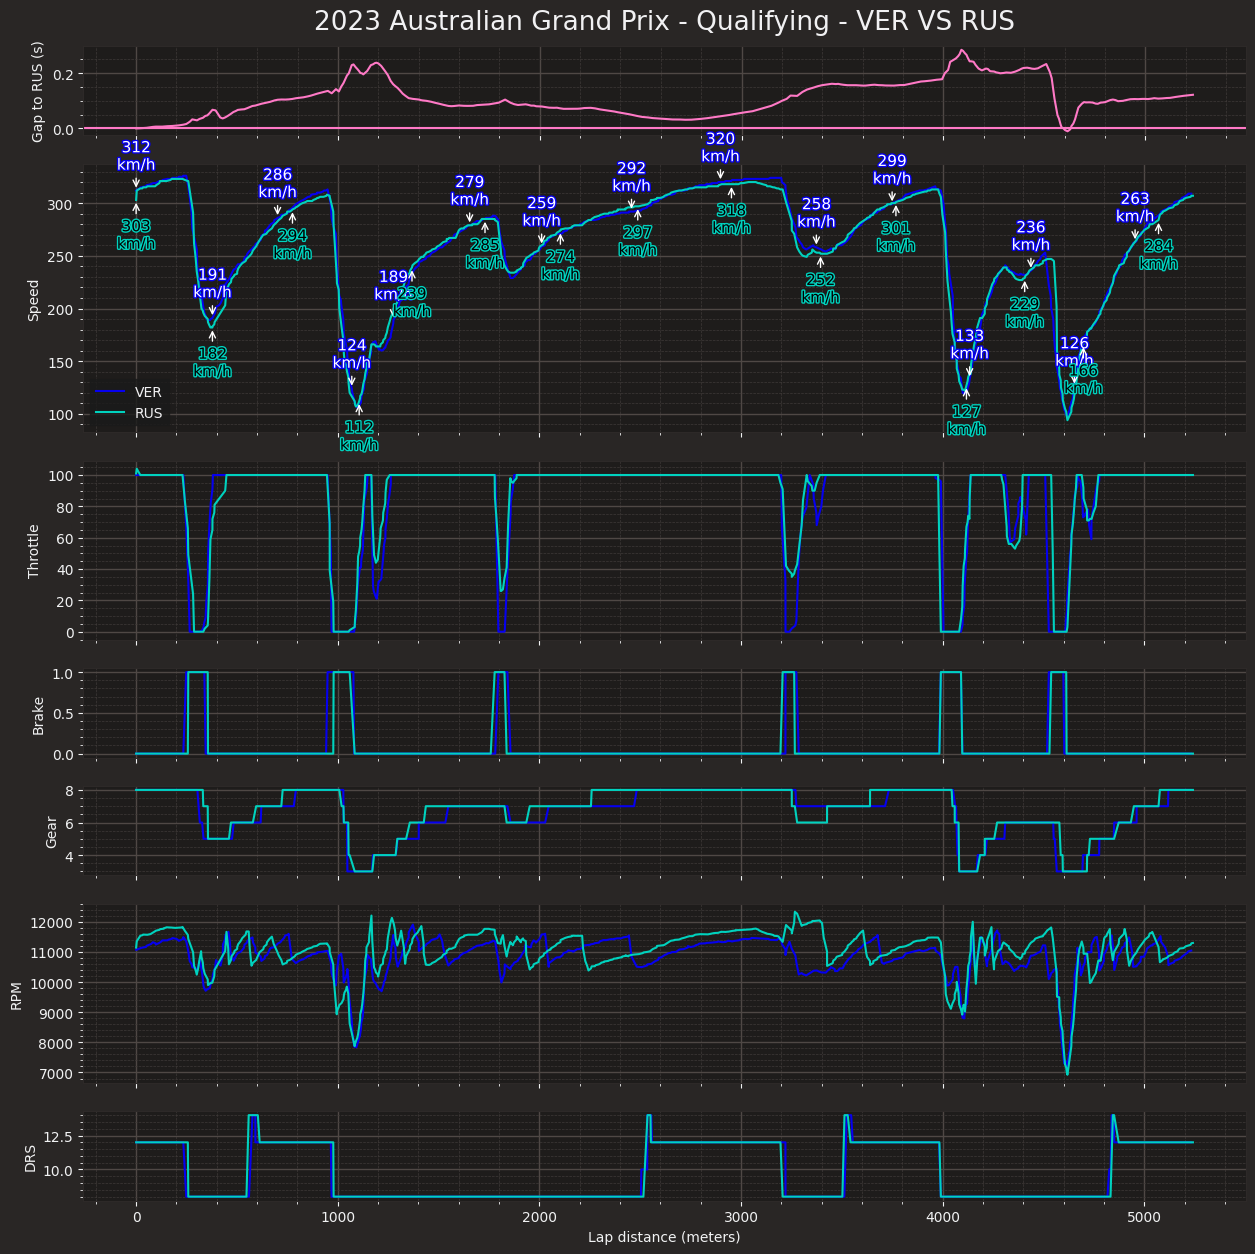

In [15]:
# Make plot a bit bigger
plt.rcParams['figure.figsize'] = plot_size

# Create subplots with different sizes
fig, ax = plt.subplots(7, gridspec_kw={'height_ratios': plot_ratios})
# x_min = 4100
# x_max = x_min+2000

# Set the plot title
ax[0].title.set_text(f'{plot_title}')


# Delta line
ax[0].plot(ref_tel['Distance'], delta_time)
ax[0].axhline(0)
ax[0].set(ylabel=f"Gap to {driver_2} (s)")

# Speed trace
ax[1].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[1].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[1].set(ylabel='Speed')
ax[1].legend(prop={"size":10})
# Find ever nTH entry in panda DataFrame
every_nTH_entry = telemetry_driver_1.iloc[::41]
every_nTH_entry_alo = telemetry_driver_2.iloc[::41]

# Plot every nTH entry as scatter points on top of the line plot
#ax[1].scatter(every_nTH_entry['Distance'].to_numpy(), every_nTH_entry['Speed'].to_numpy(), marker='o')

# Annotate every nTH entry
for index, row in every_nTH_entry.iterrows():
    x_coord = row['Distance']
    y_coord = row['Speed']
    text = f'{y_coord}\nkm/h'
    ax[1].annotate(text, (x_coord, y_coord), textcoords="offset points", xytext=(0, 15), ha='center', fontsize=11, color='white', arrowprops=dict(edgecolor='white', arrowstyle='->')).set_path_effects([pe.withStroke(linewidth=2, foreground=ff1.plotting.team_color(team_driver_1))])
for index, row in every_nTH_entry_alo.iterrows():
    x_coord = row['Distance']
    y_coord = row['Speed']
    text = f'{y_coord}\nkm/h'
    ax[1].annotate(text, (x_coord, y_coord), textcoords="offset points", xytext=(0, -35), ha='center', fontsize=11, color='black', arrowprops=dict(edgecolor='white', arrowstyle='->')).set_path_effects([pe.withStroke(linewidth=2, foreground=ff1.plotting.team_color(team_driver_2))])
    
# Throttle trace
ax[2].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Throttle'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[2].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Throttle'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[2].set(ylabel='Throttle')

# Brake trace
ax[3].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Brake'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[3].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Brake'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[3].set(ylabel='Brake')

# Gear trace
ax[4].plot(telemetry_driver_1['Distance'], telemetry_driver_1['nGear'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[4].plot(telemetry_driver_2['Distance'], telemetry_driver_2['nGear'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[4].set(ylabel='Gear')

# RPM trace
ax[5].plot(telemetry_driver_1['Distance'], telemetry_driver_1['RPM'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[5].plot(telemetry_driver_2['Distance'], telemetry_driver_2['RPM'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[5].set(ylabel='RPM')

# DRS trace
ax[6].plot(telemetry_driver_1['Distance'], telemetry_driver_1['DRS'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[6].plot(telemetry_driver_2['Distance'], telemetry_driver_2['DRS'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[6].set(ylabel='DRS')
ax[6].set(xlabel='Lap distance (meters)')

# # Smooth the 'Speed' column data using a rolling mean
# window_size = 5  # Adjust this value to control the degree of smoothing
# telemetry_driver_1['Smoothed_Speed'] = telemetry_driver_1['Speed'].rolling(window=window_size, center=True).mean()

# # Define the comparison function for argrelextrema to find local maxima
# comparator = np.greater

# # Find the indices of the local maxima in the 'Smoothed_Speed' column
# local_maxima_indices = argrelextrema(telemetry_driver_1['Smoothed_Speed'].values, comparator)

# # Filter the local maxima indices to keep only the 7 highest maximums
# top_local_maxima_indices = sorted(local_maxima_indices[0], key=lambda x: telemetry_driver_1['Smoothed_Speed'].iloc[x], reverse=True)[:7]

# # Print the indices and values of the 7 local maximums
# for idx, local_max_index in enumerate(top_local_maxima_indices):
#     local_max_value = telemetry_driver_1['Speed'].iloc[local_max_index]
#     print(f"Local Maximum {idx + 1}: Index {local_max_index}, Value {local_max_value}")
    
# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()

# for i in range(7):
#     ax[i].set_xlim(left=x_min, right=x_max)
# Store figure
plt.savefig(plot_filename, dpi=300)
plt.show()